# Authorization

An application can be registered via console.developers.google.com which supplies an API-KEY which is required to fetch data from Youtube

In [1]:
API_KEY = "YOUR API KEY"

# How to Fetch Videos Uploaded by a User

In [2]:
import requests
import json
import urllib

In [3]:
username = 'CGPGrey'

In [4]:
request_url = 'https://www.googleapis.com/youtube/v3/channels?part=contentDetails&forUsername='+username+'&key='+API_KEY
url = urllib.urlopen(request_url).read()
result = json.loads(url)
uploaded_videos_id = result['items'][0]['contentDetails']['relatedPlaylists']['uploads']
liked_videos_id = result['items'][0]['contentDetails']['relatedPlaylists']['likes']

In [8]:
request_url = 'https://www.googleapis.com/youtube/v3/playlistItems?part=contentDetails&maxResults=50&playlistId='+uploaded_videos_id+'&key='+API_KEY
url = urllib.urlopen(request_url).read()
result = json.loads(url)
videos = result['items']
video_id_list = []
for video in videos:
    print "video id: " + video['contentDetails']['videoId']
    print "published at" + video['contentDetails']['videoPublishedAt']
    video_id = video['contentDetails']['videoId']
    video_id_list.append(video_id)
    print "******************************"

video id: G3wLQz-LgrM
published at2016-11-11T19:14:21.000Z
******************************
video id: zcZTTB10_Vo
published at2016-11-09T13:37:13.000Z
******************************
video id: ig_qpNfXHIU
published at2016-11-07T13:51:54.000Z
******************************
video id: rStL7niR7gs
published at2016-10-24T15:15:59.000Z
******************************
video id: iHzzSao6ypE
published at2016-08-31T12:36:39.000Z
******************************
video id: m3_I2rfApYk
published at2016-07-15T10:08:24.000Z
******************************
video id: wfYbgdo8e-8
published at2016-05-31T13:24:53.000Z
******************************
video id: e-ZpsxnmmbE
published at2016-04-14T15:29:46.000Z
******************************
video id: VPBH1eW28mo
published at2016-04-14T12:14:53.000Z
******************************
video id: K63ZKa_tt3s
published at2016-03-31T19:27:56.000Z
******************************
video id: nQHBAdShgYI
published at2016-03-07T12:47:30.000Z
******************************
video id: 

# Info about a Video

In [13]:
video_id = video_id_list[0]
request_url = 'https://www.googleapis.com/youtube/v3/videos?part=snippet%2Cstatistics&maxResults=50&id='+video_id+'&key='+API_KEY
url = urllib.urlopen(request_url).read()
result = json.loads(url)
print 'TITLE: ' + result['items'][0]['snippet']['title']
print "*****************"
print 'DESCRIPTION: ' + result['items'][0]['snippet']['localized']['description']

TITLE: Re: The Trouble With The Electoral College – Cities, Metro Areas, Elections and The United States
*****************
DESCRIPTION: Discuss this video: http://reddit.com/r/cgpgrey
The Trouble with The Electoral College: https://www.youtube.com/watch?v=7wC42HgLA4k
How the Electoral College Works: https://www.youtube.com/watch?v=OUS9mM8Xbbw

This vlog is a bit of a mess, but as the saying goes: "I would have written a shorter letter if I had more time."  I needed to make this and upload this so I could stop thinking about it for now.  Some day I will re-do "The Trouble With The Electoral College" video, but for now this is my mini update on why the Electoral College is a friend to no one.  

And in case you wondering, this is my official position as for as the elections of individuals goes, now and forever:  https://twitter.com/cgpgrey/status/796246936072261634  

P.S. Way to go, Maine!  http://www.boston.com/news/politics/2016/11/10/maine-became-the-first-state-in-the-country-to-pas

## Statistics of a Video

In [14]:
video_statistics = result['items'][0]['statistics']
viewCount = video_statistics['viewCount']
print 'View Count: ' + viewCount
likeCount = video_statistics['likeCount']
print 'Like Count: ' + likeCount
dislikeCount = video_statistics['dislikeCount']
print 'Dislike Count: ' + dislikeCount
favoriteCount = video_statistics['favoriteCount']
print 'Favorite Count: ' + favoriteCount
commentCount = video_statistics['commentCount']
print 'Comment Count: ' + commentCount

View Count: 1560013
Like Count: 52239
Dislike Count: 3854
Favorite Count: 0
Comment Count: 13787


## Comments to a Video

In [15]:
request_url = 'https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&maxResults=50&videoId='+video_id+'&key='+API_KEY
url = urllib.urlopen(request_url).read()
result = json.loads(url)
items = result['items']
for item in items:
    print "New comment"
    snippet = item['snippet']
    print "Reply number to this comment: " + str(snippet['totalReplyCount'])
    comment = snippet['topLevelComment']['snippet']
    author = comment['authorDisplayName']
    print "Owner of comment: " + author
    authorChannelId = comment['authorChannelId']['value']
    print "Author's channel id: " + authorChannelId
    text = comment['textDisplay']
    print text
    commentId = snippet['topLevelComment']['id']
    print "comment id: " + commentId
    print "********************************"

New comment
Reply number to this comment: 0
Owner of comment: Jaxon Duin
Author's channel id: UCGRZTzOS-mjGZj9bQBNgPqA
Man, I still wanna see that Settlers of Catan video... The election has me bummed, and I think we all need an uplifting documentary on board game design.﻿
comment id: z13ufrfgkm3svhgry04cjlnrvwrmfzmw0gc
********************************
New comment
Reply number to this comment: 0
Owner of comment: The Random Hour
Author's channel id: UCijW0WUBwRH4pDkq-pknZkg
With the electoral college controlling the vote, does the Russian interference of the election theory have any grounds, if instead of voting computers, it was American human minds that chose the president?﻿
comment id: z120sflxxlbxf1xa204cifjq4mahcf54xzs0k
********************************
New comment
Reply number to this comment: 0
Owner of comment: UnrealProductions
Author's channel id: UC8sPFx1KbzXmg2Ql_cOwJdQ
The only thing wrong with the electoral college is the winner-take-all system it uses. Instead we should 

# Working on Channels

In [16]:
#Trabzonspor's official channel url
channel_link = "https://www.youtube.com/channel/UCnZoe1ncVK7ApLBPfpZ_LEA"

# Channel's videos

In [17]:
channel_id = "UCnZoe1ncVK7ApLBPfpZ_LEA"

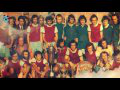

TITLE: Trabzonspor 50. yıl taraftar marşı


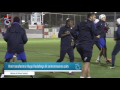

TITLE: Yeni transferimiz Hugo Rodallega ilk antrenmanına çıktı


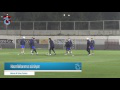

TITLE: Hazırlıklarımız sürüyor


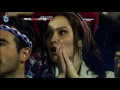

TITLE: Trabzonspor 50. yıl marşı


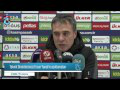

TITLE: Teknik Direktörümüz Ersun Yanal'ın açıklamaları


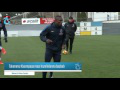

TITLE: Takımımız Kasımpaşa maçı hazırlıklarına başladı


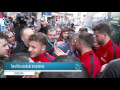

TITLE: Torul'da coşkulu karşılama


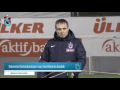

TITLE: Takımımız Gümüşhanespor maçı hazırlıklarına başladı


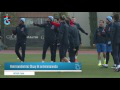

TITLE: Yeni transferimiz Olcay ilk antrenmanında


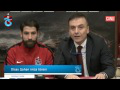

TITLE: Olcay Şahan imza töreni


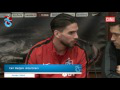

TITLE: Carl Medjani imza töreni


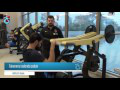

TITLE: Takımımız salonda çalıştı


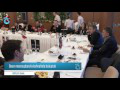

TITLE: Basın mensuplarıyla kahvaltıda buluştuk


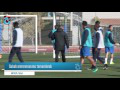

TITLE: Sabah antrenmanımız tamamlandı


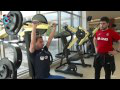

TITLE: Takımımız salonda çalıştı


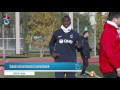

TITLE: Sabah antrenmanımız tamamlandı


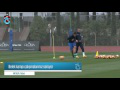

TITLE: Belek kampı çalışmalarımız sürüyor


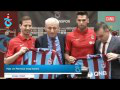

TITLE: Mas ve Perreira İmza Töreni


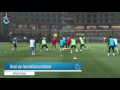

TITLE: İkinci Yarı Hazırlıklarımız Sürüyor - #AntrenmanGünlüğü


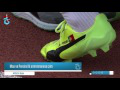

TITLE: Mas ve Perreira İlk Antrenmanına Çıktı - #AntrenmanGünlüğü


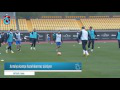

TITLE: Antalya Kampı Hazırlıklarımız Sürüyor - #AntrenmanGünlüğü


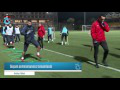

TITLE: Akşam Antrenmanımız Tamamlandı - #AntrenmanGünlüğü


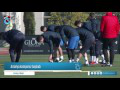

TITLE: Antalya Kampımız Başladı - #AntrenmanGünlüğü


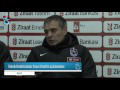

TITLE: Teknik Direktörümüz Ersun Yanal'ın açıklamalarI


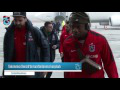

TITLE: Takımımızı Denizli'de taraftarlarımız karşıladı


In [31]:
from PIL import Image
from StringIO import StringIO
from IPython import display
import urllib2

request_url = "https://www.googleapis.com/youtube/v3/search?order=date&part=snippet&channelId="+channel_id+"&maxResults=25&key="+API_KEY
url = urllib.urlopen(request_url).read()
result = json.loads(url)
videos = result['items']
video_id_list = []
for video in videos:
    img_url = video['snippet']['thumbnails']['default']['url']
    f = urllib2.urlopen(img_url)
    im = Image.open(StringIO(f.read()))
    display.display(im)
    print 'TITLE: ' + video['snippet']['title']

# Search

In [32]:
query = "arduino"

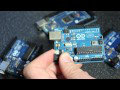

TITLE: Thinking About Getting an Arduino? Watch This
DESCRIPTION: What is an Arduino and why should you care? In this video, I attempt to answer that question, and more. If you're an absolute beginner to Arduino, or are just ...
channelID: UCfXdejDvNviqilmJ9DvGuow
channel Title: MakeUseOf


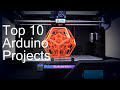

TITLE: Top 10 Arduino Projects
DESCRIPTION: Top 10 Cool arduino projects/arduino uno Projects. Top 10 DIY innovative arduino projects ,This video shares Cool Ideas of some of Advanced arduino Projects.
channelID: UCWfmYGqCCM1nterCb0I0OKA
channel Title: RZtronics


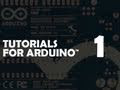

TITLE: Tutorial 01 for Arduino: Getting Acquainted with Arduino
DESCRIPTION: New Episodes each Monday! You can download the parts list and the code from this episode on my website: ...
channelID: UC4KXPjmKwPutGjwFZsEXB5g
channel Title: Jeremy Blum


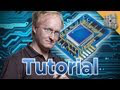

TITLE: Everything You Need To Know About Arduino
DESCRIPTION: Ben teaches you everything you need to know to start using Arduino microcontrollers in your projects Ask Ben Questions in the element14 Community: ...
channelID: UChturLXwYxwTOf_5krs0qvA
channel Title: The Ben Heck Show


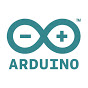

TITLE: Arduino
DESCRIPTION: 
channelID: UCUpmmT1Gm_raVpqSvQYyd2Q
channel Title: Arduino


In [34]:
request_url = 'https://www.googleapis.com/youtube/v3/search?part=snippet&q='+query+'&key='+API_KEY
url = urllib.urlopen(request_url).read()
result = json.loads(url)
videos = result['items']
for video in videos:
    img_url = video['snippet']['thumbnails']['default']['url']
    f = urllib2.urlopen(img_url)
    im = Image.open(StringIO(f.read()))
    display.display(im)
    print 'TITLE: ' + video['snippet']['title']
    print 'DESCRIPTION: ' + video['snippet']['description']
    print 'channelID: ' + video['snippet']['channelId']
    print 'channel Title: ' + video['snippet']['channelTitle']